## （1）参数设置

In [1]:
learning_rate = 0.01 
epoches = 100


## （2）导入数据

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('', one_hot=True)

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## (3) define functions


In [3]:
# conv layer
import tensorflow as tf

def conv(input, filter_shape, bias_shape, strides_shape):
    filter1 = tf.get_variable('filter', filter_shape, initializer=tf.truncated_normal_initializer())
    bias = tf.get_variable('bias',bias_shape, initializer=tf.truncated_normal_initializer())
    conv = tf.nn.conv2d(input,filter1,strides=strides_shape,padding='SAME')
    output = tf.nn.sigmoid(conv+bias)
    return output

def pooling(input,ksize_shape,strides_shape):
    output = tf.nn.max_pool(input,ksize=ksize_shape, strides=strides_shape,padding='SAME')
    return output


def full_connect(input, weight_shape, bias_shape, flat_shape):
    weight = tf.get_variable('weight',weight_shape, initializer=tf.truncated_normal_initializer())
    bias = tf.get_variable('bias',bias_shape,initializer=tf.truncated_normal_initializer())
    flat = tf.reshape(input,flat_shape)
    output = tf.nn.sigmoid(tf.matmul(flat,weight)+bias)
    return output






## (4)Build Model

In [4]:
with tf.name_scope('Input'):
    x_data = tf.placeholder(tf.float32, [None, 784])
    y_data = tf.placeholder(tf.float32, [None, 10])
    x_image = tf.reshape(x_data, [-1, 28, 28, 1])

with tf.variable_scope('Conv1'):
    conv1_output = conv(x_image, [5, 5, 1, 6], [6], [1, 1, 1, 1])

with tf.variable_scope('Pooling1'):
    pooling1_output = pooling(conv1_output, [1, 2, 2, 1], [1, 2, 2, 1])

with tf.variable_scope('Conv2'):
    conv2_output = conv(pooling1_output, [5, 5, 6, 16], [16], [1, 1, 1, 1])

with tf.variable_scope('Pooling2'):
    pooling2_output = pooling(conv2_output, [1, 2, 2, 1], [1, 2, 2, 1])

with tf.variable_scope('Conv3'):
    conv3_output = conv(pooling2_output, [5, 5, 16, 120], [120], [1, 1, 1, 1])

with tf.variable_scope('Connection'):
    connection_output = full_connect(conv3_output, [7*7*120, 80], [80], [-1, 7*7*120])

with tf.name_scope('Output'):
    weight = tf.Variable( tf.truncated_normal([80, 10]),dtype= tf.float32)
    bias = tf.Variable(tf.truncated_normal([10]),dtype= tf.float32)
    y_model = tf.nn.softmax(tf.add(tf.matmul(connection_output, weight), bias))

## (5)define loss function 

In [5]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_model,logits=y_data))
    tf.summary.scalar('The variation of the loss',loss)
    
with tf.name_scope('Accuracy'):
    prediction = tf.equal(tf.argmax(y_model,1),tf.arg_max(y_data,1))
    accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))
    tf.summary.scalar('The variation of the accuracy',accuracy)

INFO:tensorflow:Summary name The variation of the loss is illegal; using The_variation_of_the_loss instead.
Instructions for updating:
Use `argmax` instead
INFO:tensorflow:Summary name The variation of the accuracy is illegal; using The_variation_of_the_accuracy instead.


In [6]:
with tf.name_scope('Train'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_batch, y_batch = mnist.train.next_batch(50)
    writer = tf.summary.FileWriter("logs/", sess.graph)
    merged = tf.summary.merge_all()
    batch_x, batch_y = mnist.train.next_batch(200)
    a = []
    b = []
    for i in range(100):
        b.append(i+1)
        sess.run(train_op, feed_dict={x_data: batch_x, y_data: batch_y})
        print(sess.run(accuracy, feed_dict={x_data: mnist.test.images, y_data: mnist.test.labels}))
        summary, acc = sess.run([merged, accuracy],
                            feed_dict={x_data: mnist.test.images, y_data: mnist.test.labels})
        a.append(acc)
        writer.add_summary(summary, _)
    writer.close()


0.098
0.098
0.098
0.098
0.098
0.0983
0.0982
0.0982
0.0982
0.0982
0.0982
0.0982
0.0982
0.0982
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.1009
0.1009
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101
0.101


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


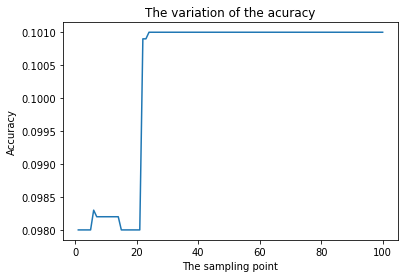

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
print(b)
plt.plot(b,a)
plt.title('The variation of the acuracy')
plt.xlabel('The sampling point')
plt.ylabel('Accuracy')
#plt.tight_layout()
plt.show()    